# Vertical distribution of cloud cover from CloudSat/CALIPSO

This notebook reproduces Figure 1a.

Data: cloud incidence from CloudSat/Calipso constructed by Ying Li, CSU, USA.

### Load libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.15.1
numpy:      1.18.1
matplotlib: 3.2.1


## Load data

In [3]:
cc = xr.open_dataset('../../data/obs/CloudSatCALIPSO_cloud_fraction_bin_sum_200606-201104.clim.nc').squeeze()

## Plotting

Make a cgrey colormap based on 'Greys' but not using the blackish colors for high values. This was taken from https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib.

In [4]:
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

my_Greys = truncate_colormap(plt.get_cmap('Greys'), 0.0, 0.8)

Latitude-pressure view of cloud incidence from CloudSat/Calipso

/home/fd8940/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


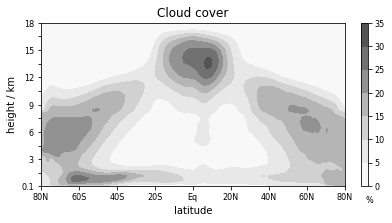

In [5]:
clev=np.array([0,5,10,15,20,25,30,35])

plt.figure(figsize=(5.915, 3))
ax=plt.subplot(1,1,1)
plt.contourf(cc.lat, cc.lev/1000, cc['cloud_fraction'].mean('lon'), clev, cmap=my_Greys)
cb=plt.colorbar(aspect=25,fraction=0.03)
cb.set_ticks([0,5,10,15,20,25,30,35]) # vertically oriented colorbar
cb.ax.tick_params(labelsize=8)
plt.xlim(-80,80)
plt.ylim(0.1,18)
plt.xlabel('latitude',fontsize=10); plt.ylabel('height / km', fontsize=10)
plt.xticks([-80,-60,-40,-20,0,20,40,60,80],['80N','60S', '40S', '20S', 'Eq', '20N', '40N', '60N', '80N'], fontsize=8);
plt.yticks([0.1,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15,16.5,18],['0.1','','3','','6','','9','','12','','15','','18'], fontsize=8);
plt.text(1.07,-0.10,'%', fontsize=8,transform=ax.transAxes)
plt.title('Cloud cover', fontsize=12)

plt.savefig('figure-1a.pdf')